# Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from pandas import read_csv
filename = 'Heart.csv'
data_heart = read_csv(filename)
data_heart.shape

(303, 14)

In [2]:
data_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
num_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [4]:
n_miss=data_heart.isnull().sum()        
for col in range(data_heart.shape[1]):       
    print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))

Column 0 has 0 missing values.
Column 1 has 0 missing values.
Column 2 has 0 missing values.
Column 3 has 0 missing values.
Column 4 has 0 missing values.
Column 5 has 0 missing values.
Column 6 has 0 missing values.
Column 7 has 0 missing values.
Column 8 has 0 missing values.
Column 9 has 0 missing values.
Column 10 has 0 missing values.
Column 11 has 0 missing values.
Column 12 has 0 missing values.
Column 13 has 0 missing values.


# Descriptive statistics

In [5]:
description = data_heart.describe()
description

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Correlation

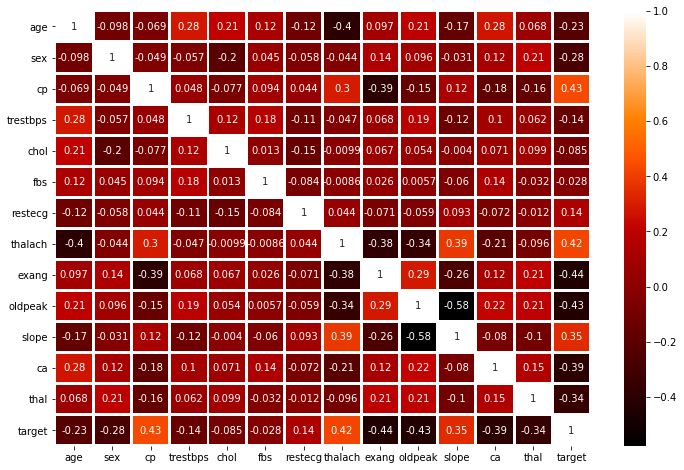

In [6]:
import seaborn as sns

plt.figure(figsize=(12,8)) 
sns.heatmap(data_heart.corr(), annot=True, cmap='gist_heat', linewidths = 2)
plt.show()

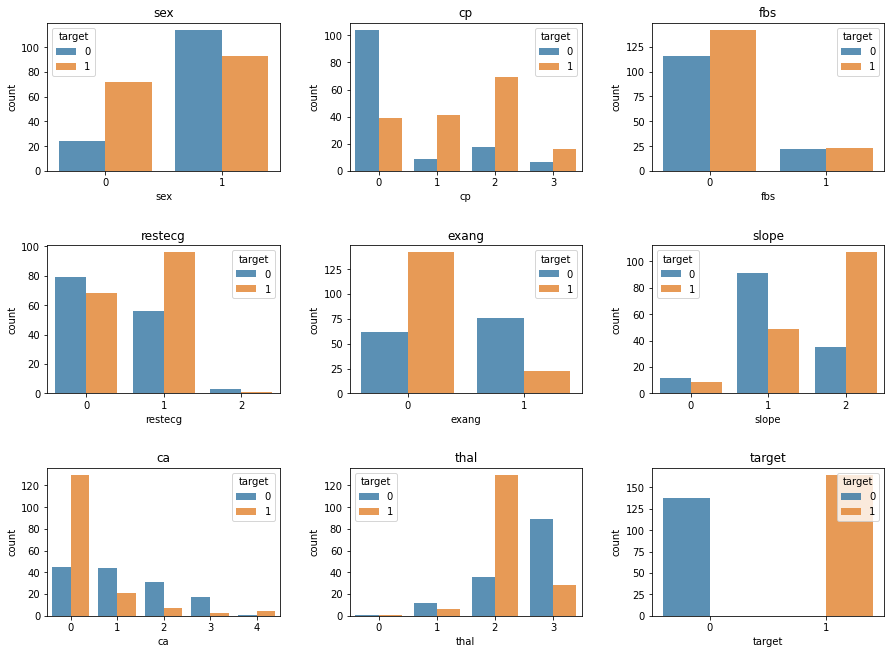

In [7]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(cat_feat):
    plt.subplot(4, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=data_heart, x=col, hue='target', alpha=0.8, linewidth=1)

Text(0.5, 1.0, 'Blood pressure (mm/Hg)')

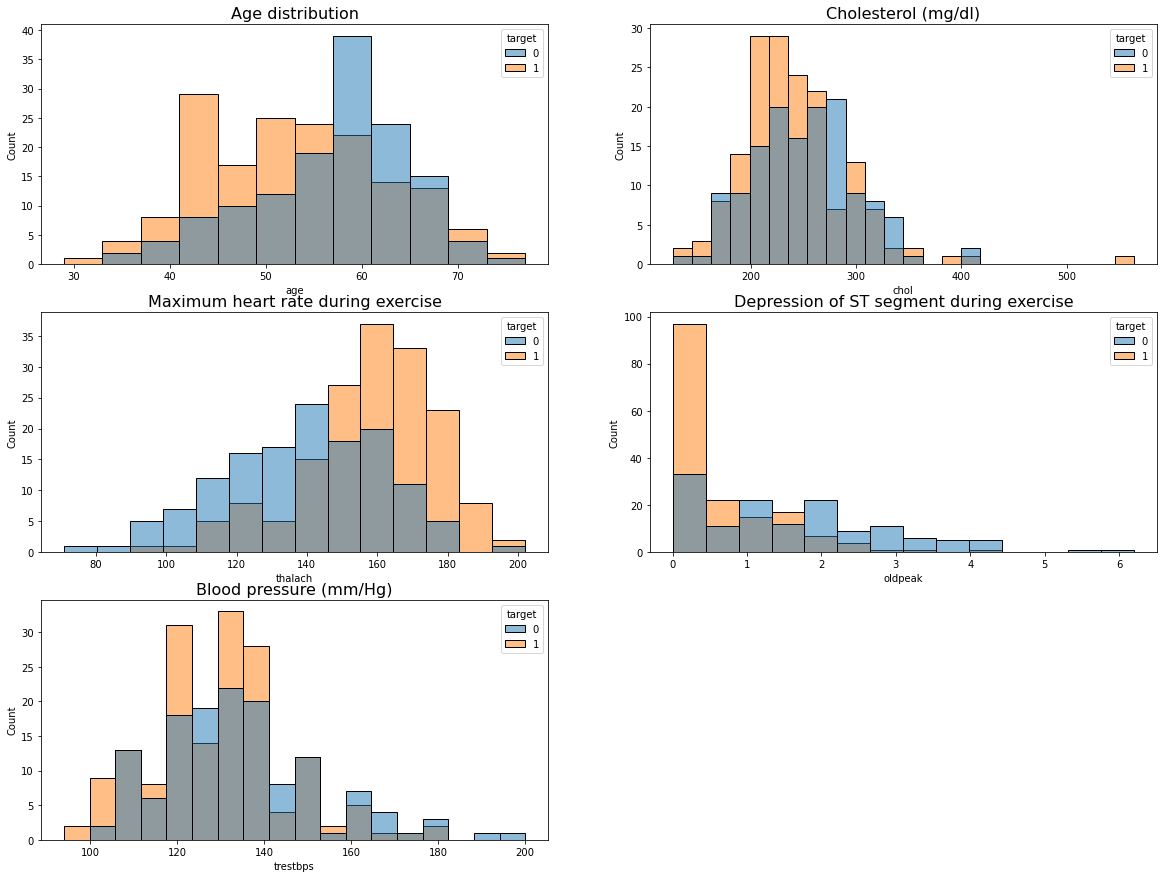

In [8]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.histplot(data=data_heart, x="age", hue="target")
plt.title('Age distribution', size=16)
plt.subplot(3,2,2)
sns.histplot(data=data_heart, x="chol", hue="target")
plt.title('Cholesterol (mg/dl)', size=16)
plt.subplot(3,2,3)
sns.histplot(data=data_heart, x="thalach", hue="target")
plt.title('Maximum heart rate during exercise', size=16)
plt.subplot(3,2,4)
sns.histplot(data=data_heart, x="oldpeak", hue="target")
plt.title('Depression of ST segment during exercise', size=16)
plt.subplot(3,2,5)
sns.histplot(data=data_heart, x="trestbps", hue="target",)
plt.title('Blood pressure (mm/Hg)', size=16)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

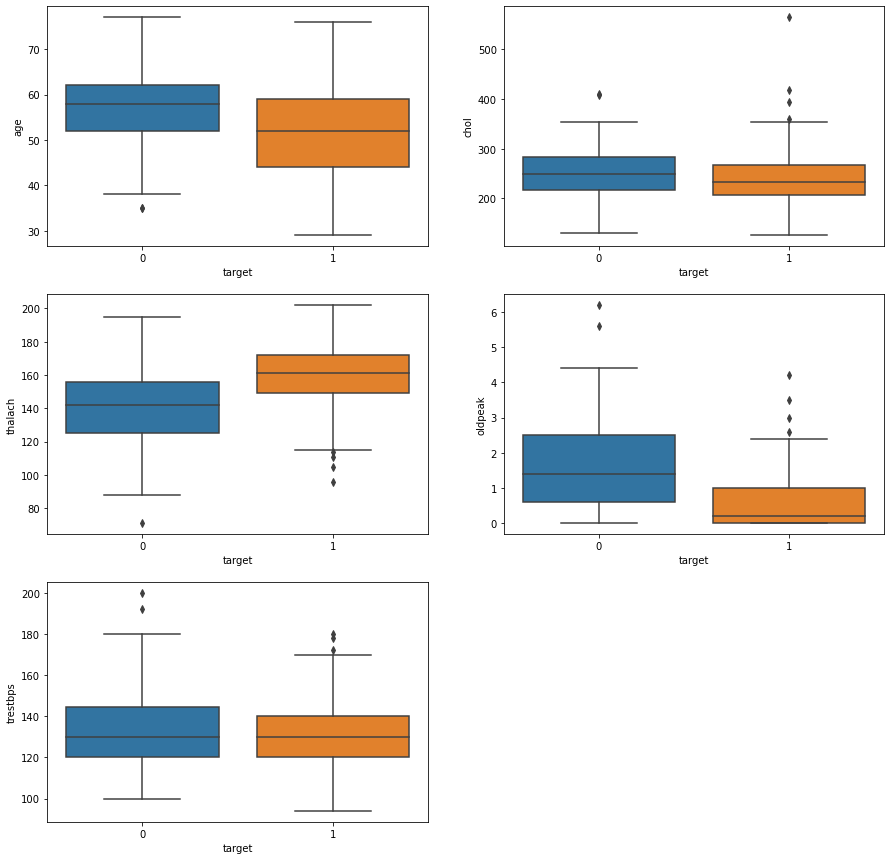

In [9]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(data=data_heart, x="target", y="age")

plt.subplot(3,2,2)
sns.boxplot(data=data_heart, x="target", y="chol")

plt.subplot(3,2,3)
sns.boxplot(data=data_heart, x="target", y="thalach")

plt.subplot(3,2,4)
sns.boxplot(data=data_heart, x="target", y="oldpeak")

plt.subplot(3,2,5)
sns.boxplot(data=data_heart, x="target", y="trestbps")

Text(0.5, 1.0, 'Percentage of target')

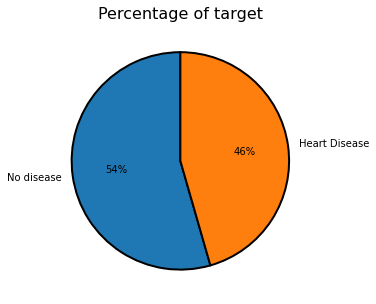

In [10]:
plt.figure(figsize=(5, 5))
plt.pie(data_heart["target"].value_counts(),
        labels = ["No disease", "Heart Disease"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);
plt.title('Percentage of target', size=16)

# Pre-process

In [11]:
last_column = len(data_heart.columns) - 1
y=data_heart.iloc[:,last_column]
X=data_heart.drop(data_heart.columns[-1],axis=1)
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (242, 13) (242,)
shape of X and y respectively (test) : (61, 13) (61,)


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification models without parameter tuning 

### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(random_state=42, max_features='auto')
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[24  5]
 [ 5 27]]
-------------------------------------------
Accuracy of Random Forest: 83.60655737704919 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression

model_lgr = 'Logistic Regression'
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
scores_lr.append(lr_acc_score)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

NameError: name 'scores_lr' is not defined

### Decision trees

In [18]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[26  3]
 [ 8 24]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 81.9672131147541 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



### SVM

In [19]:
model_svc = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2, random_state=42)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,svc_predicted))

confussion matrix
[[26  3]
 [ 6 26]]
-------------------------------------------
Accuracy of Support Vector Classifier: 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



# Model visualization without parameter tuning

<AxesSubplot:title={'center':'Heart Disease --- Model: Support Vector Classifier --- Accuracy:0.85246'}>

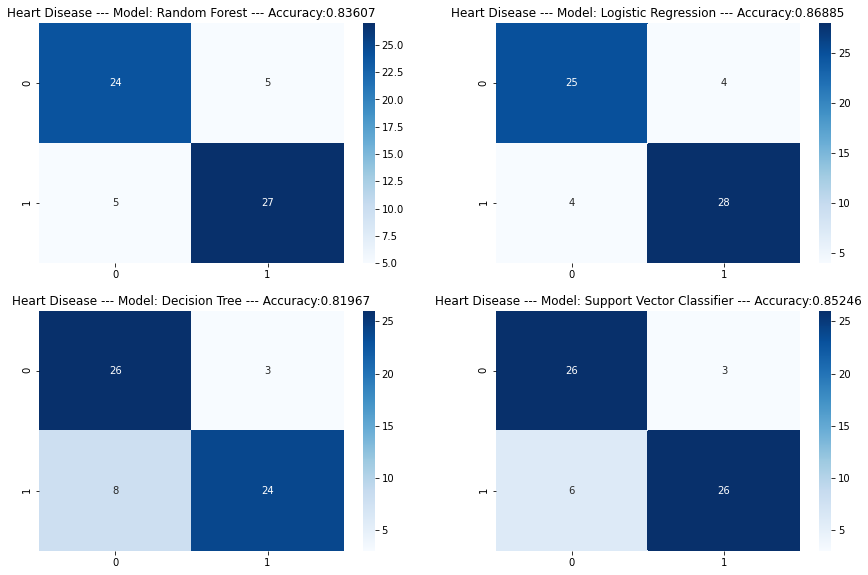

In [20]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('Heart Disease --- Model: Random Forest --- Accuracy:{x:.5f}'.format(x=rf_acc_score) )
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,2)
plt.title('Heart Disease --- Model: Logistic Regression --- Accuracy:{x:.5f}'.format(x=lr_acc_score))
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,3)
plt.title('Heart Disease --- Model: Decision Tree --- Accuracy:{x:.5f}'.format(x=dt_acc_score))
sns.heatmap(dt_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,4)
plt.title('Heart Disease --- Model: Support Vector Classifier --- Accuracy:{x:.5f}'.format(x=svc_acc_score))
sns.heatmap(svc_conf_matrix, annot=True, cmap="Blues")

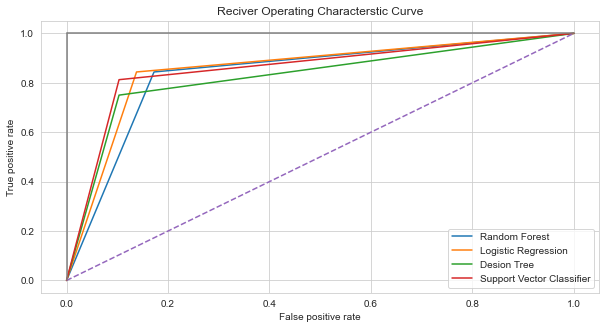

In [21]:
from sklearn.metrics import roc_curve

rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted) 
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [22]:
model_ev = pd.DataFrame({'Model': ['Random Forest','Logistic Regression','Decision Tree','Support Vector Machine'], 
                         'Accuracy': [rf_acc_score*100,lr_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Random Forest,83.606557
1,Logistic Regression,86.885246
2,Decision Tree,81.967213
3,Support Vector Machine,85.245902


In [23]:
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test,rf_predicted)
auc_lr = roc_auc_score(y_test,lr_predict)
auc_dt = roc_auc_score(y_test,dt_predicted)
auc_svc = roc_auc_score(y_test,svc_predicted)

print("AUC RF: {}".format(auc_rf))
print("AUC LR: {}".format(auc_lr))
print("AUC DT: {}".format(auc_dt))
print("AUC SM: {}".format(auc_svc))

AUC RF: 0.8356681034482758
AUC LR: 0.8529094827586207
AUC DT: 0.8232758620689656
AUC SM: 0.8545258620689655


# Parameter tuning using GridsearchCV

### Random forest

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
RF_param_grid = {
    'max_features': range(1, X_train.shape[1]),
    'n_estimators': range(1, 100, 5)
}

rf_class = RandomForestClassifier(max_features='auto', random_state=42)
grid_search = GridSearchCV(estimator = rf_class, param_grid = RF_param_grid, 
                          cv = LeaveOneOut(), n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_
RF_best_grid = grid_search.best_estimator_
RF_best_grid.fit(X_train,y_train)
rf_tuned_predicted = RF_best_grid.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_tuned_predicted)
rf_acc_score = accuracy_score(y_test, rf_tuned_predicted)
print(grid_search.best_params_)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_tuned_predicted))


Fitting 242 folds for each of 240 candidates, totalling 58080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 890 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 2634 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 3524 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4425 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 7378 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 8722 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 9573 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 11352 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 12365 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 13458 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 15304 tasks  

{'max_features': 3, 'n_estimators': 46}
confussion matrix
[[25  4]
 [ 4 28]]
-------------------------------------------
Accuracy of Random Forest: 86.88524590163934 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(max_features=3,n_estimators=46, random_state=42)
rf_class.fit(X_train,y_train)
rf_tuned_predicted = rf_class.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_tuned_predicted)
rf_acc_score = accuracy_score(y_test, rf_tuned_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_tuned_predicted))

confussion matrix
[[25  4]
 [ 4 28]]
-------------------------------------------
Accuracy of Random Forest: 86.88524590163934 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Logistic Regression

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
LR_param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

lr_class = LogisticRegression(random_state=42,penalty='l2')
grid_search_LR = GridSearchCV(estimator = lr_class, param_grid = LR_param_grid, 
                          cv = LeaveOneOut(), n_jobs = -1, verbose = 2)
grid_search_LR.fit(X_train, y_train)
grid_search_LR.best_params_
LR_best_grid = grid_search_LR.best_estimator_
LR_best_grid.fit(X_train,y_train)
lr_tuned_predicted = LR_best_grid.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_tuned_predicted)
lr_acc_score = accuracy_score(y_test, lr_tuned_predicted)
print(grid_search_LR.best_params_)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of logistic:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_tuned_predicted))


Fitting 242 folds for each of 15 candidates, totalling 3630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:    2.9s


{'C': 0.1, 'solver': 'liblinear'}
confussion matrix
[[25  4]
 [ 4 28]]
-------------------------------------------
Accuracy of logistic: 86.88524590163934 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



[Parallel(n_jobs=-1)]: Done 3613 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 3630 out of 3630 | elapsed:    8.1s finished


### Decision trees

In [27]:
DT_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,5),
    'min_samples_leaf': range(1,5)
}

dt_class = DecisionTreeClassifier(random_state=42)
grid_search_DT = GridSearchCV(estimator = dt_class, param_grid = DT_param_grid, 
                          cv = LeaveOneOut(), n_jobs = -1, verbose = 2)
grid_search_DT.fit(X_train, y_train)
grid_search_DT.best_params_
DT_best_grid = grid_search_DT.best_estimator_
DT_best_grid.fit(X_train,y_train)
dt_tuned_predicted = DT_best_grid.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_tuned_predicted)
dt_acc_score = accuracy_score(y_test, dt_tuned_predicted)
print(grid_search_DT.best_params_)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of decision trees:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_tuned_predicted))

Fitting 242 folds for each of 288 candidates, totalling 69696 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 5904 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 14960 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 26640 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 40880 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 57744 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 69696 out of 69696 | elapsed:  1.3min finished


{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
confussion matrix
[[21  8]
 [ 5 27]]
-------------------------------------------
Accuracy of decision trees: 78.68852459016394 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.77      0.84      0.81        32

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



### SVM

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
SVM_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVM_class = SVC(random_state=42)
grid_search_SVM = GridSearchCV(estimator = SVM_class, param_grid = SVM_param_grid, 
                          cv = LeaveOneOut(), n_jobs = -1, verbose = 2)
grid_search_SVM.fit(X_train, y_train)
grid_search_SVM.best_params_
SVM_best_grid = grid_search_SVM.best_estimator_
SVM_best_grid.fit(X_train,y_train)
SVM_tuned_predicted = SVM_best_grid.predict(X_test)
SVM_conf_matrix = confusion_matrix(y_test, SVM_tuned_predicted)
SVM_acc_score = accuracy_score(y_test, SVM_tuned_predicted)
print(grid_search_SVM.best_params_)
print("confussion matrix")
print(SVM_conf_matrix)
print("-------------------------------------------")
print("Accuracy of decision trees:",SVM_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,SVM_tuned_predicted))

Fitting 242 folds for each of 25 candidates, totalling 6050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:    4.8s


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
confussion matrix
[[25  4]
 [ 5 27]]
-------------------------------------------
Accuracy of decision trees: 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



[Parallel(n_jobs=-1)]: Done 6050 out of 6050 | elapsed:   11.4s finished


<AxesSubplot:title={'center':'Heart Disease --- Model: Support Vector Classifier --- Accuracy:0.85246'}>

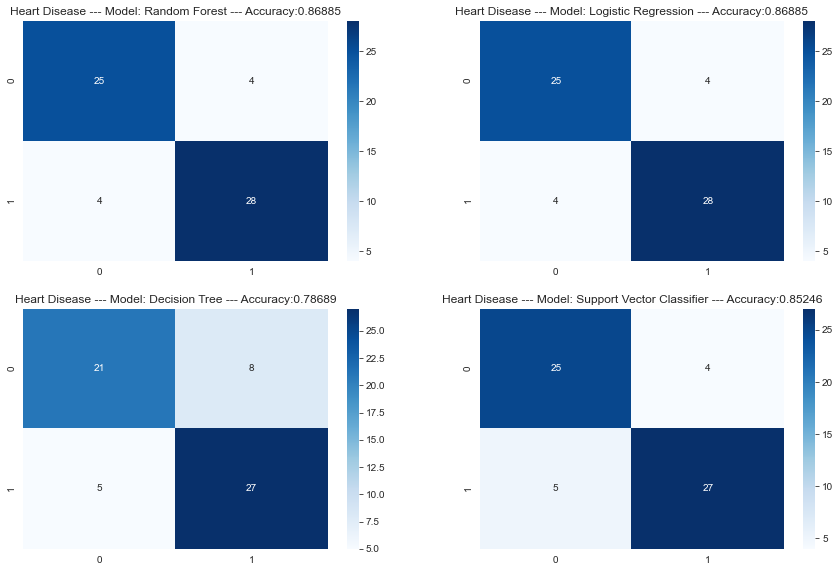

In [30]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('Heart Disease --- Model: Random Forest --- Accuracy:{x:.5f}'.format(x=rf_acc_score) )
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,2)
plt.title('Heart Disease --- Model: Logistic Regression --- Accuracy:{x:.5f}'.format(x=lr_acc_score))
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,3)
plt.title('Heart Disease --- Model: Decision Tree --- Accuracy:{x:.5f}'.format(x=dt_acc_score))
sns.heatmap(dt_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,2,4)
plt.title('Heart Disease --- Model: Support Vector Classifier --- Accuracy:{x:.5f}'.format(x=SVM_acc_score))
sns.heatmap(SVM_conf_matrix, annot=True, cmap="Blues")

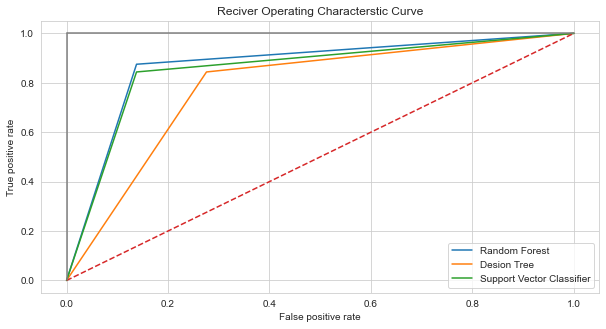

In [37]:

rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_tuned_predicted) 
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_tuned_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_tuned_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,SVM_tuned_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test,rf_tuned_predicted)
auc_lr = roc_auc_score(y_test,lr_tuned_predicted)
auc_dt = roc_auc_score(y_test,dt_tuned_predicted)
auc_svc = roc_auc_score(y_test,SVM_tuned_predicted)

print("AUC RF: {}".format(auc_rf))
print("AUC LR: {}".format(auc_lr))
print("AUC DT: {}".format(auc_dt))
print("AUC SM: {}".format(auc_svc))

AUC RF: 0.8685344827586206
AUC LR: 0.8685344827586206
AUC DT: 0.7839439655172414
AUC SM: 0.8529094827586207


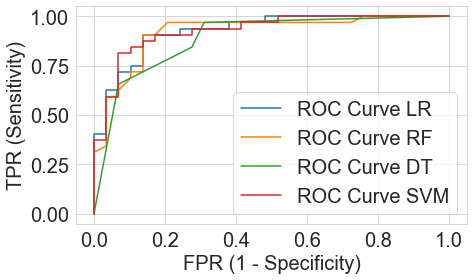

In [72]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test, LR_best_grid.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_class.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, DT_best_grid.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, SVM_best_grid.decision_function(X_test))

plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label="ROC Curve LR")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.plot(fpr_dt, tpr_dt, label="ROC Curve DT")
plt.plot(fpr_svm, tpr_svm, label="ROC Curve SVM")
plt.ylabel("TPR (Sensitivity)", fontsize=20)
plt.xlabel("FPR (1 - Specificity)", fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)

In [73]:
import pandas as pd
from sklearn.metrics import roc_auc_score
np.set_printoptions(precision=3, suppress=True)
pd.set_option('precision', 3)
rf_auc = roc_auc_score(y_test, LR_best_grid.predict_proba(X_test)[:,1])
lr_auc = roc_auc_score(y_test, rf_class.predict_proba(X_test)[:, 1])
dt_auc = roc_auc_score(y_test, DT_best_grid.predict_proba(X_test)[:, 1])
svm_auc = roc_auc_score(y_test, SVM_best_grid.decision_function(X_test))
print("AUC for random forest: {}".format(rf_auc))
print("AUC for LR: {}".format(lr_auc))
print("AUC for DT: {}".format(dt_auc))
print("AUC for SVM: {}".format(svm_auc))

AUC for random forest: 0.9267241379310345
AUC for LR: 0.9191810344827587
AUC for DT: 0.8879310344827587
AUC for SVM: 0.9267241379310345


## Feature importance

In [40]:
feature_cols = X.columns
feat_imp = pd.DataFrame({'feature':feature_cols, 'importance':rf_class.feature_importances_}).sort_values('importance', ascending=False)
feat_imp

,feature,importance
11,ca,0.124082
9,oldpeak,0.120132
2,cp,0.115839
7,thalach,0.106668
8,exang,0.090245
12,thal,0.087783
0,age,0.081901
4,chol,0.079209
3,trestbps,0.070455
10,slope,0.057513


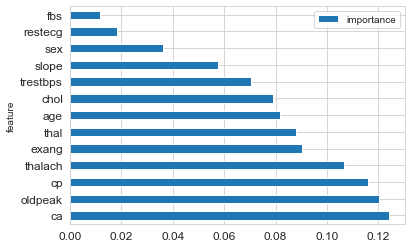

In [41]:
ax=feat_imp.plot.barh(y='importance',x='feature')

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

[[-0.09937583 -0.52862934  0.57492462 -0.17931422 -0.09278908  0.05414255
   0.17444104  0.31709826 -0.42621891 -0.49847872  0.32533913 -0.55785416
  -0.42845519]]


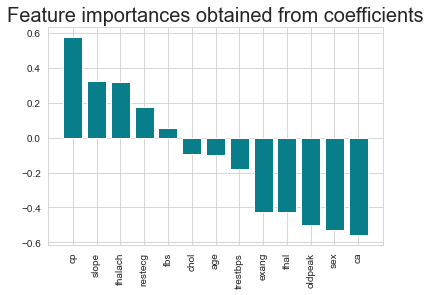

In [42]:
print(LR_best_grid.coef_)
importances = pd.DataFrame(data={
    'Attribute': feature_cols,
    'Importance': LR_best_grid.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


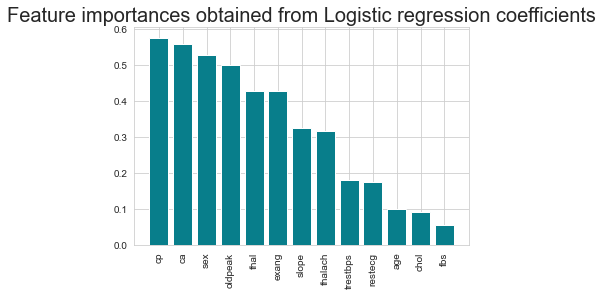

In [43]:
feature_cols = X.columns
coef=LR_best_grid.coef_[0]
importances = pd.DataFrame(data={
    'Attribute': feature_cols,
    'Importance': np.absolute(coef)
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from Logistic regression coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Feature selection

In [45]:
X_feat_sel=X.drop(['fbs', 'restecg','trestbps'], axis=1)

In [46]:
X_train_feat_sel, X_test_feat_sel, y_train, y_test = train_test_split(X_feat_sel, y, test_size=0.2, random_state=42)
X_train_feat_sel = scaler.fit_transform(X_train_feat_sel)
X_test_feat_sel = scaler.transform(X_test_feat_sel)

## Random Forest

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
RF_param_grid_feat_sel = {
    'max_features': range(1, X_train_feat_sel.shape[1]),
    'n_estimators': range(1, 100, 5)
}

rf_class_feat_sel = RandomForestClassifier(max_features='auto', random_state=42)
rf_grid_search_feat_sel = GridSearchCV(estimator = rf_class_feat_sel, param_grid = RF_param_grid_feat_sel, 
                          cv = LeaveOneOut(), n_jobs = -1, verbose = 2)
rf_grid_search_feat_sel.fit(X_train_feat_sel, y_train)
rf_grid_search_feat_sel.best_params_
RF_best_grid_feat_sel = rf_grid_search_feat_sel.best_estimator_
RF_best_grid_feat_sel.fit(X_train_feat_sel,y_train)
rf_tuned_predicted_feat_sel = RF_best_grid_feat_sel.predict(X_test_feat_sel)
rf_conf_matrix_feat_sel = confusion_matrix(y_test, rf_tuned_predicted_feat_sel)
rf_acc_score_feat_sel = accuracy_score(y_test, rf_tuned_predicted_feat_sel)
print(rf_grid_search_feat_sel.best_params_)
print("confussion matrix")
print(rf_conf_matrix_feat_sel)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score_feat_sel*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_tuned_predicted_feat_sel))

Fitting 242 folds for each of 180 candidates, totalling 43560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 2048 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 2778 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 3668 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4609 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 6360 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 7738 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 9266 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 11322 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 13184 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 15610 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 17796 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 19632 tasks

{'max_features': 1, 'n_estimators': 21}
confussion matrix
[[23  6]
 [ 3 29]]
-------------------------------------------
Accuracy of Random Forest: 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



## Logistic regression

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
LR_param_grid_feat_sel = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

lr_class_feat_sel = LogisticRegression(random_state=42,penalty='l2')
grid_search_LR_feat_sel = GridSearchCV(estimator = lr_class_feat_sel, param_grid = LR_param_grid_feat_sel, 
                          cv = LeaveOneOut(), n_jobs = -1, verbose = 2)
grid_search_LR_feat_sel.fit(X_train_feat_sel, y_train)
grid_search_LR_feat_sel.best_params_
LR_best_grid_feat_sel = grid_search_LR_feat_sel.best_estimator_
LR_best_grid_feat_sel.fit(X_train_feat_sel,y_train)
lr_tuned_predicted_feat_sel = LR_best_grid_feat_sel.predict(X_test_feat_sel)
lr_conf_matrix_feat_sel = confusion_matrix(y_test, lr_tuned_predicted_feat_sel)
lr_acc_score_feat_sel = accuracy_score(y_test, lr_tuned_predicted_feat_sel)
print(grid_search_LR_feat_sel.best_params_)
print("confussion matrix")
print(lr_conf_matrix_feat_sel)
print("-------------------------------------------")
print("Accuracy of logistic:",lr_acc_score_feat_sel*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_tuned_predicted_feat_sel))

Fitting 242 folds for each of 15 candidates, totalling 3630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:    2.8s


{'C': 0.01, 'solver': 'newton-cg'}
confussion matrix
[[25  4]
 [ 3 29]]
-------------------------------------------
Accuracy of logistic: 88.52459016393442 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



[Parallel(n_jobs=-1)]: Done 3613 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 3630 out of 3630 | elapsed:    7.5s finished


# Visuals

<AxesSubplot:title={'center':'Heart Disease --- Model: Logistic Regression --- Accuracy:0.88525'}>

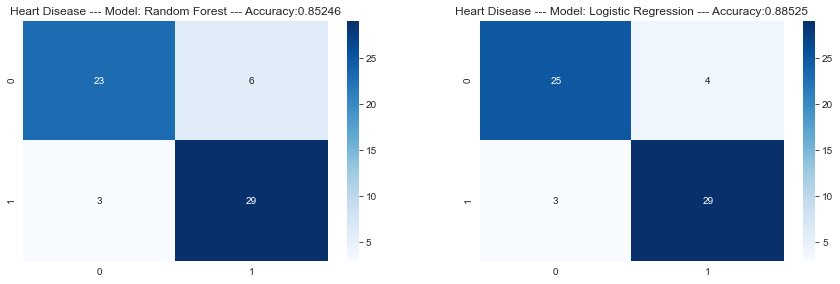

In [51]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('Heart Disease --- Model: Random Forest --- Accuracy:{x:.5f}'.format(x=rf_acc_score_feat_sel) )
sns.heatmap(rf_conf_matrix_feat_sel, annot=True, cmap="Blues")

plt.subplot(3,2,2)
plt.title('Heart Disease --- Model: Logistic Regression --- Accuracy:{x:.5f}'.format(x=lr_acc_score_feat_sel))
sns.heatmap(lr_conf_matrix_feat_sel, annot=True, cmap="Blues")

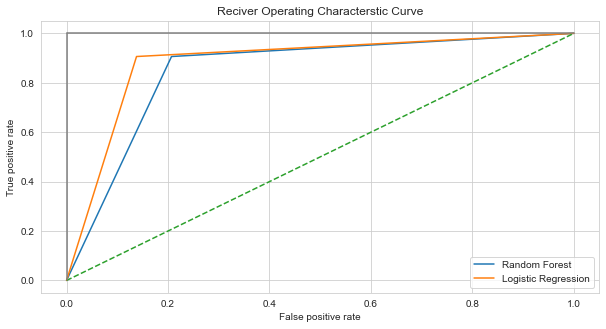

In [52]:

rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_tuned_predicted_feat_sel) 
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_tuned_predicted_feat_sel)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [53]:
auc_rf = roc_auc_score(y_test,rf_tuned_predicted_feat_sel)
auc_lr = roc_auc_score(y_test,lr_tuned_predicted_feat_sel)

print("AUC RF: {}".format(auc_rf))
print("AUC LR: {}".format(auc_lr))

AUC RF: 0.849676724137931
AUC LR: 0.8841594827586207


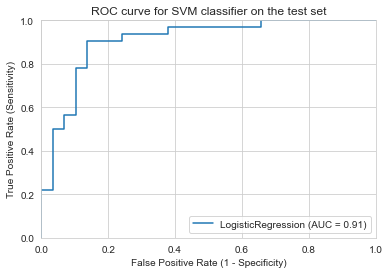

In [57]:
from sklearn import metrics
from sklearn.metrics import roc_curve
metrics.plot_roc_curve(LR_best_grid_feat_sel, X_test_feat_sel, y_test) 

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic regression classifier on the test set')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

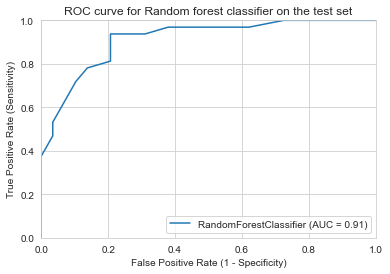

In [59]:
from sklearn import metrics
from sklearn.metrics import roc_curve
metrics.plot_roc_curve(RF_best_grid_feat_sel, X_test_feat_sel, y_test) 

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random forest classifier on the test set')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

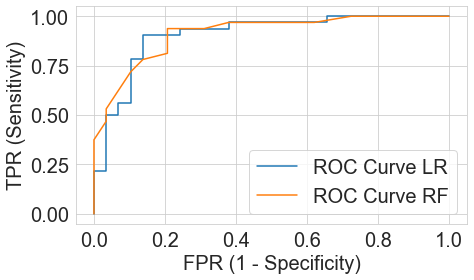

In [68]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
fpr, tpr, thresholds = roc_curve(y_test, LR_best_grid_feat_sel.predict_proba(X_test_feat_sel)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, RF_best_grid_feat_sel.predict_proba(X_test_feat_sel)[:, 1])

plt.figure(figsize=(7,4))
plt.plot(fpr, tpr, label="ROC Curve LR")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.ylabel("TPR (Sensitivity)", fontsize=20)
plt.xlabel("FPR (1 - Specificity)", fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)

In [71]:
import pandas as pd
from sklearn.metrics import roc_auc_score
np.set_printoptions(precision=3, suppress=True)
pd.set_option('precision', 3)
rf_auc = roc_auc_score(y_test, RF_best_grid_feat_sel.predict_proba(X_test_feat_sel)[:, 1])
lr_auc = roc_auc_score(y_test, LR_best_grid_feat_sel.predict_proba(X_test_feat_sel)[:,1])
print("AUC for random forest: {}".format(rf_auc))
print("AUC for LR: {}".format(lr_auc))

AUC for random forest: 0.9127155172413793
AUC for LR: 0.90625
